<center><h1>IMM Performance - Quadcopter</h1></center>

## LOAD LIBRARIES

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import configparser
import plotly.graph_objects as go
from InitialState.initial_state import InitialState
from KalmanFilters.kalman_filters import KalmanFilters
from IMM.imm import IMM
from Calcs.calcs import *
from Charts.charts import Charts as ch
from NotebookFunctions.imm_performance_functions import *

## PROFILE & MEASUREMENTS

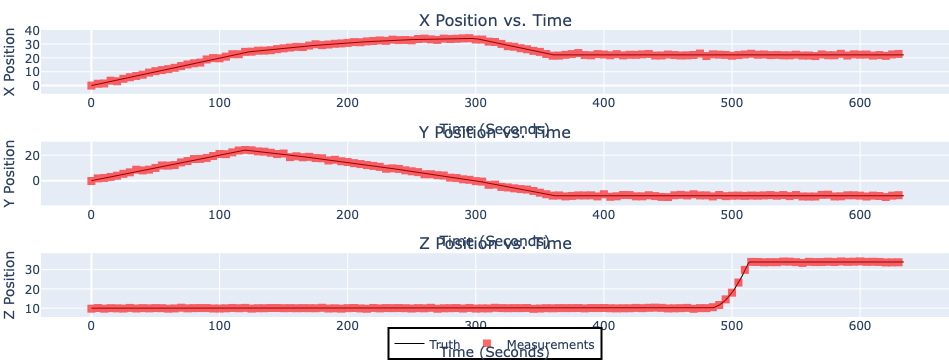

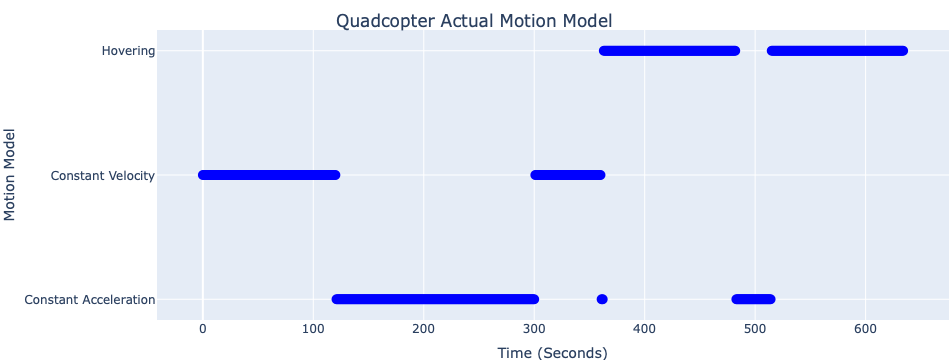

In [10]:
# Load Data
truth_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_truth.csv'),dtype={'Model':'category'})
meas_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_measurements.csv'))
profile_fig = ch.quadcopter_xyz(
    truth_df = truth_df,
    meas_df = meas_df,
    leg_pos = -0.15,
    height = 800,
)
profile_fig.show()
strip_fig = ch.truth_strip_chart(truth_df,400)
strip_fig.show()

## ONLY NEAR CONSTANT VELOCITY

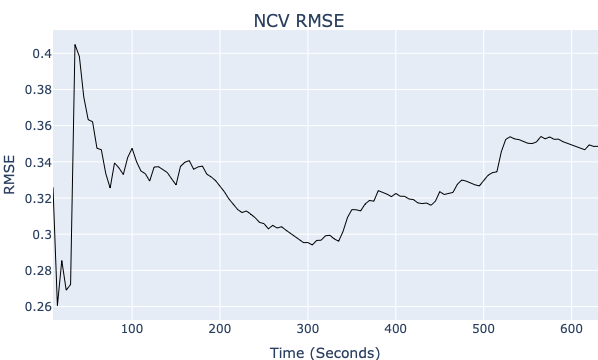

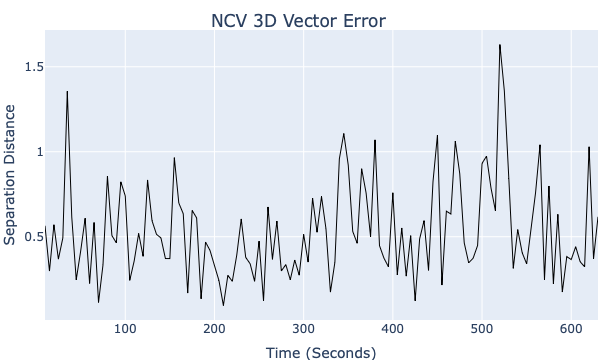

In [5]:
# Load Data
truth_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_truth.csv'),dtype={'Model':'category'})
meas_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_measurements.csv'))
# Kalman Filter
kf_df = execute_kf_cv()
error_df = calculate_errors(truth_df,kf_df)
rmse_fig = ch.rmse_chart(error_df.RMSE_COMBINED,error_df.Time,'NCV RMSE')
rmse_fig.show()
ve3d_fig = ch.ve3d_chart(error_df.VE3D,error_df.Time,'NCV 3D Vector Error')
ve3d_fig.show()

## ONLY CONSTANT ACCELERATION

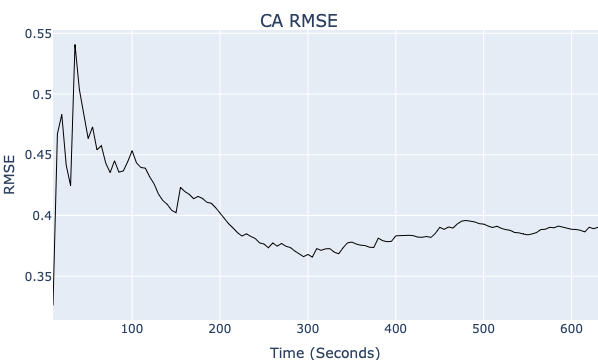

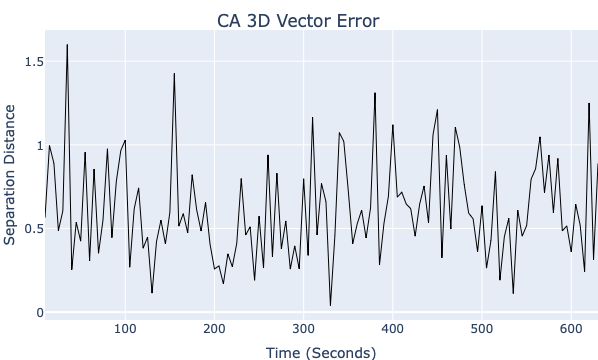

In [7]:
# Load Data
truth_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_truth.csv'),dtype={'Model':'category'})
meas_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_measurements.csv'))
# Kalman Filter
kf_df = execute_kf_ca()
error_df = calculate_errors(truth_df,kf_df)
rmse_fig = ch.rmse_chart(error_df.RMSE_COMBINED,error_df.Time,'CA RMSE')
rmse_fig.show()
ve3d_fig = ch.ve3d_chart(error_df.VE3D,error_df.Time,'CA 3D Vector Error')
ve3d_fig.show()

## ONLY HOVERING

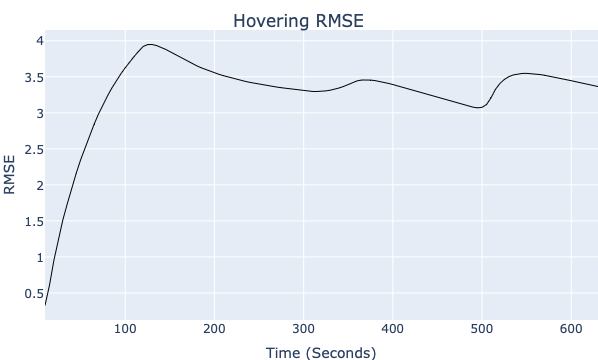

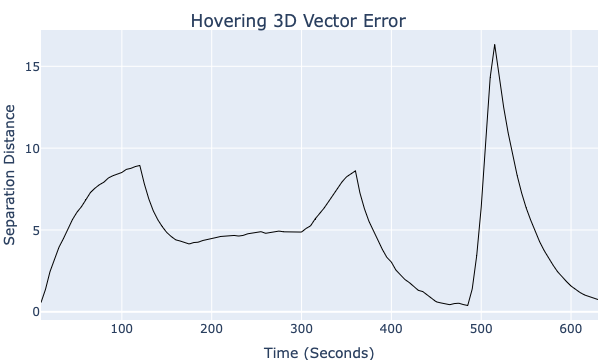

In [9]:
# Load Data
truth_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_truth.csv'),dtype={'Model':'category'})
meas_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_measurements.csv'))
# Kalman Filter
kf_df = execute_kf_h()
error_df = calculate_errors(truth_df,kf_df)
rmse_fig = ch.rmse_chart(error_df.RMSE_COMBINED,error_df.Time,'Hovering RMSE')
rmse_fig.show()
ve3d_fig = ch.ve3d_chart(error_df.VE3D,error_df.Time,'Hovering 3D Vector Error')
ve3d_fig.show()

## IMM - NCV & CA

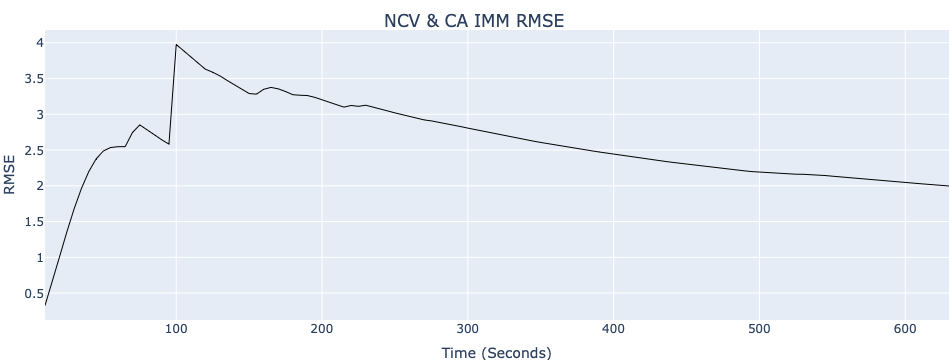

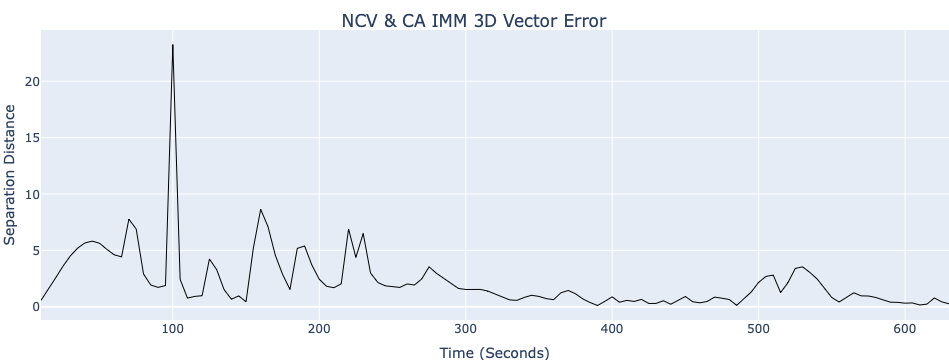

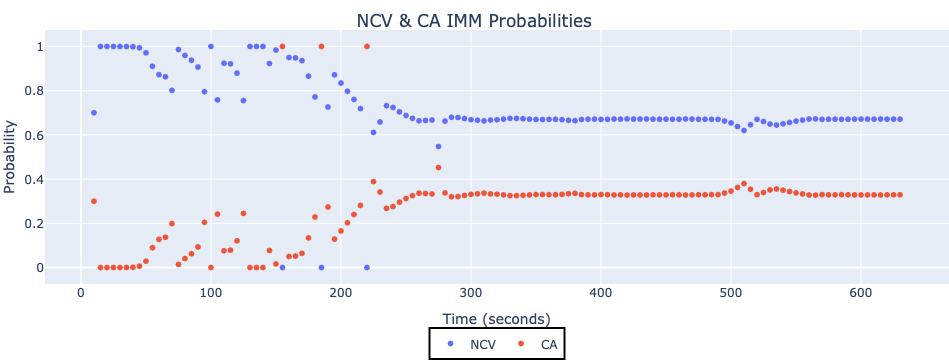

In [21]:
# Load Data
truth_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_truth.csv'),dtype={'Model':'category'})
meas_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_measurements.csv'))
# Kalman Filter
imm_df = execute_imm_ncv_ca()
error_df = calculate_errors(truth_df,imm_df)
rmse_fig = ch.rmse_chart(error_df.RMSE_COMBINED,error_df.Time,'NCV & CA IMM RMSE')
rmse_fig.show()
ve3d_fig = ch.ve3d_chart(error_df.VE3D,error_df.Time,'NCV & CA IMM 3D Vector Error')
ve3d_fig.show()
prob_fig = ch.probability_chart(imm_df.Time,imm_df.PROB_NCV,imm_df.PROB_CA,pd.Series([]),'NCV & CA IMM Probabilities',-0.3)
prob_fig.show()

## IMM - ALL MODELS

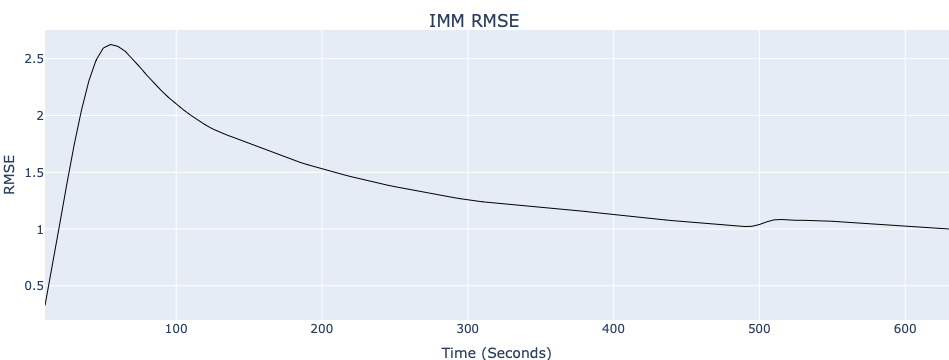

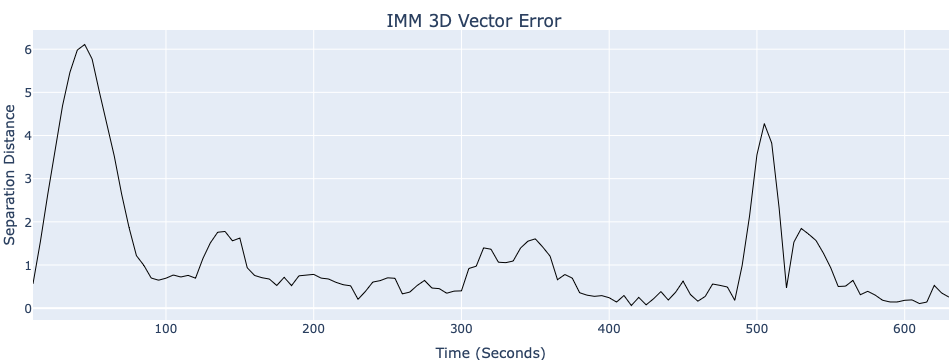

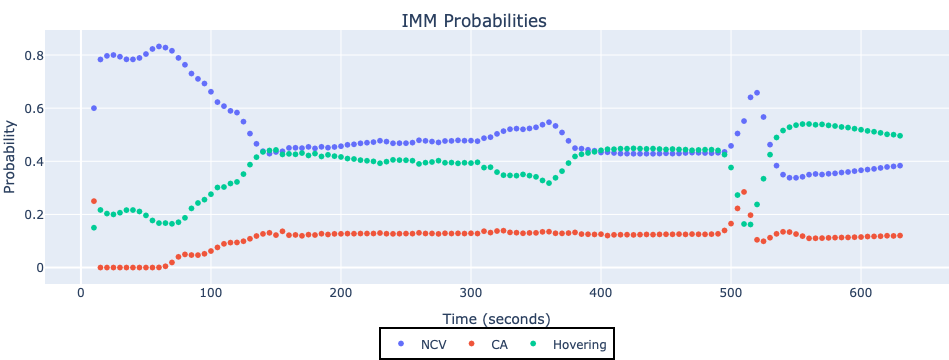

In [19]:
# Load Data
truth_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_truth.csv'),dtype={'Model':'category'})
meas_df = pd.read_csv(os.path.join('Data','quadcopter_profile2_measurements.csv'))
# Kalman Filter
imm_df = execute_imm()
error_df = calculate_errors(truth_df,imm_df)
rmse_fig = ch.rmse_chart(error_df.RMSE_COMBINED,error_df.Time,'IMM RMSE')
rmse_fig.show()
ve3d_fig = ch.ve3d_chart(error_df.VE3D,error_df.Time,'IMM 3D Vector Error')
ve3d_fig.show()
prob_fig = ch.probability_chart(imm_df.Time,imm_df.PROB_NCV,imm_df.PROB_CA,imm_df.PROB_H,'IMM Probabilities',-0.3)
prob_fig.show()

In [5]:
sys.float_info.min

2.2250738585072014e-308